## Diabetes Prediction Pipeline

### Overview
This project aims to develop a machine learning pipeline to predict the likelihood of diabetes in patients based on medical and demographic features. The dataset used includes information such as

**age, gender, BMI, hypertension, heart disease,**

**smoking history, HbA1c level, and blood glucose level.**

The pipeline follows end-to-end processes from data preprocessing to model deployment, incorporating evaluation metrics, user interaction, and scalability.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dataset Shape: (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

diabetes
0    91500
1     8500
Name: count, dtype: int64

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,Female,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,Male,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,Female,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,Male,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
5,Female,20.0,0,0,27.32,6.6,85,0,False,False,False,True,False
6,Female,44.0,0,0,19.31,6.5,200,1,False,False,False,True,False
7,Female,79.0,0,0,23.86,5.7,85,0,False,False,False,False,False
8,Male,42.0,0,0,33.64,4.8,145,0,False,False,False,True,False
9,Female,32.0,0,0,27.32,5.0,100,0,False,False,False,True,False


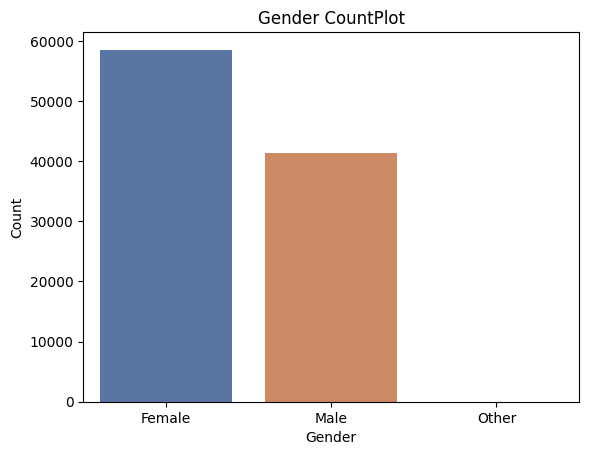

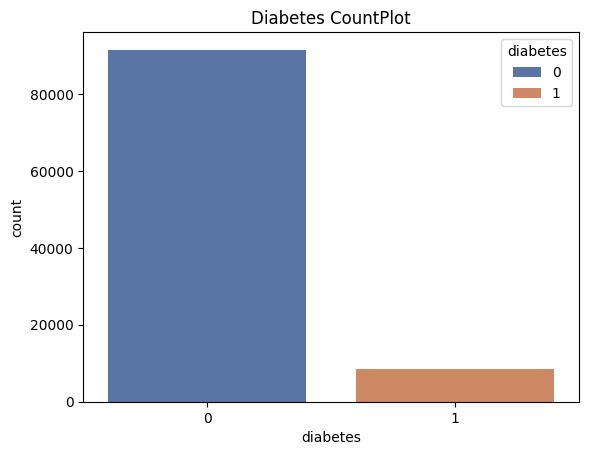

Dataset Shape: (100000, 13)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


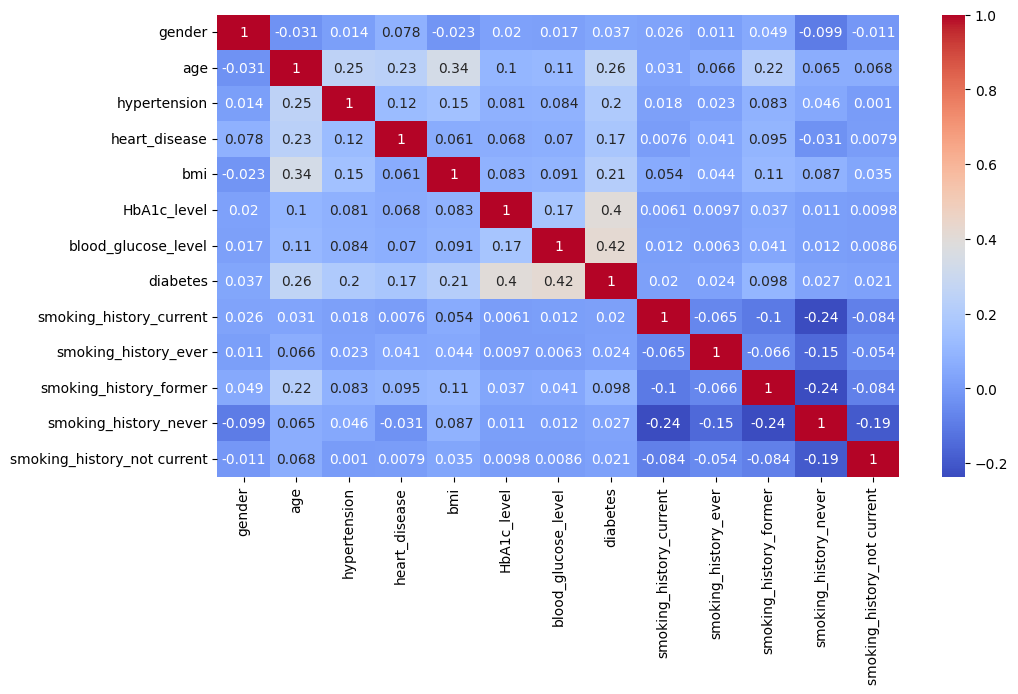

<Axes: xlabel='blood_glucose_level', ylabel='bmi'>

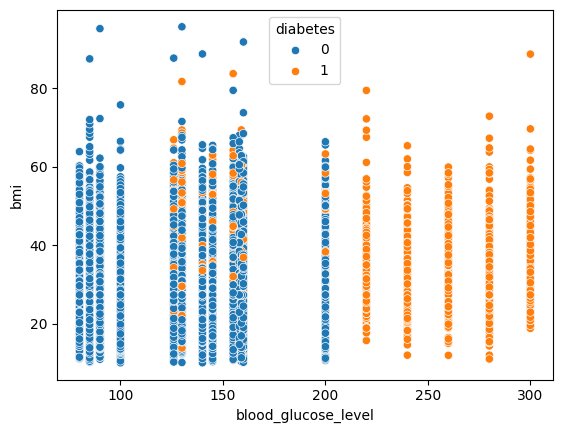

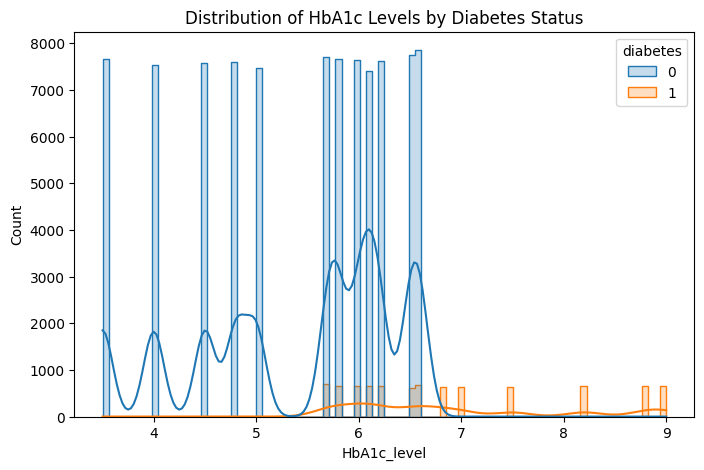

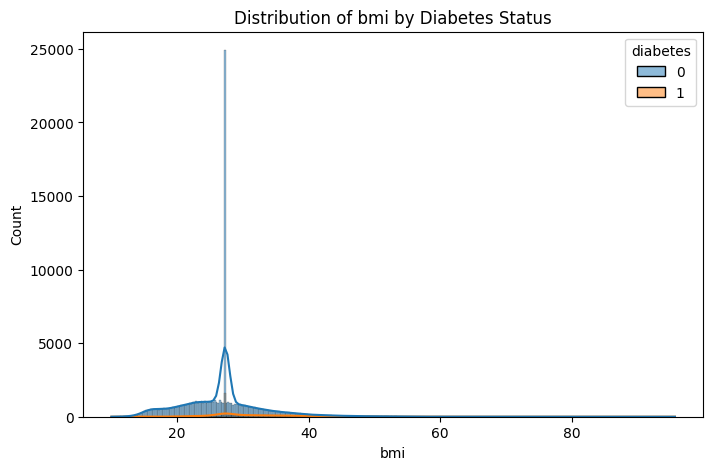

Training Dataset Shape: X=(80000, 12), y=(80000,)
Testing Dataset Shape: X=(20000, 12), y=(20000,)


RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.96965


Logistic Regression Accuracy:  0.9605


Decision Tree Accuracy:  0.9508


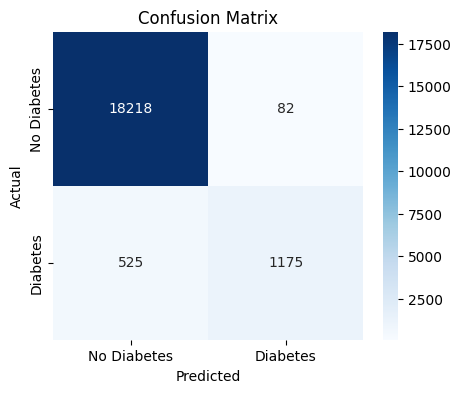


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



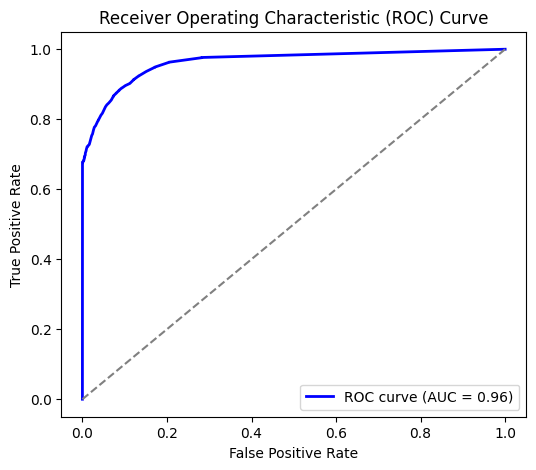

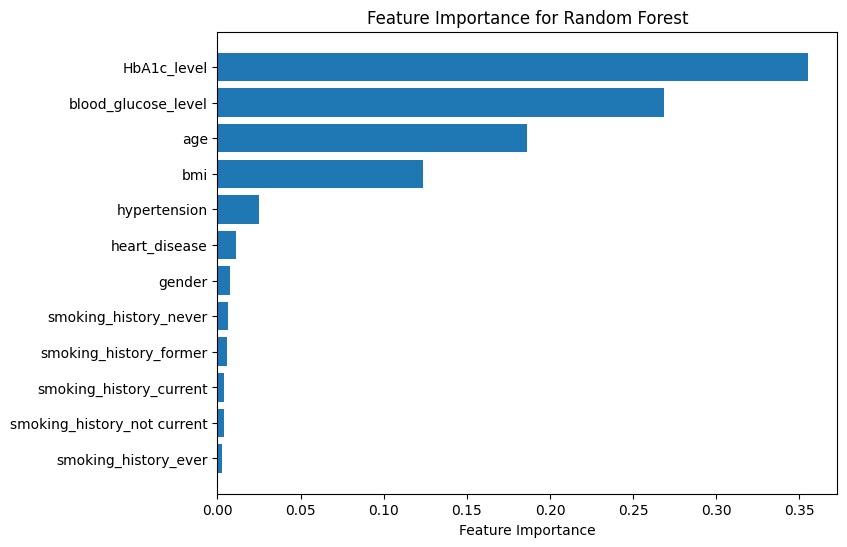

['../models/encoder.pkl']

### Loading the dataset

In [2]:
df = pd.read_csv("../data/diabetes_prediction_dataset.csv")
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### Checking for missing values and data info

In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Data Preprocessing And Visualizations

In [4]:
# checking dataset shape
print("Dataset Shape:", df.shape)

# checking dataset info
df.info()

Dataset Shape: (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [5]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [6]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [3]:
# Encoding the categorical feature smoking__history
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
df.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,Female,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,Male,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,Female,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,Male,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
5,Female,20.0,0,0,27.32,6.6,85,0,False,False,False,True,False
6,Female,44.0,0,0,19.31,6.5,200,1,False,False,False,True,False
7,Female,79.0,0,0,23.86,5.7,85,0,False,False,False,False,False
8,Male,42.0,0,0,33.64,4.8,145,0,False,False,False,True,False
9,Female,32.0,0,0,27.32,5.0,100,0,False,False,False,True,False


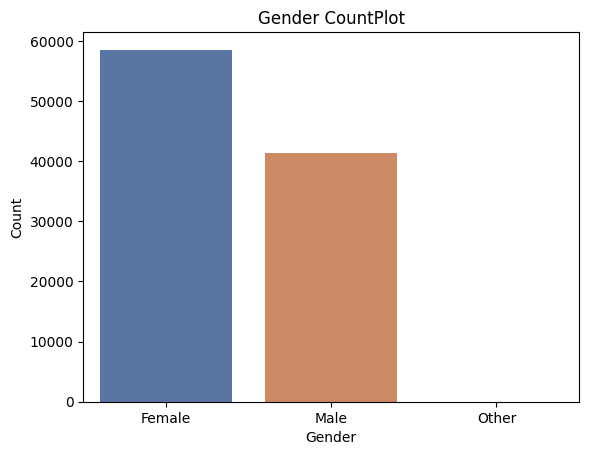

In [6]:
# Countplot of Gender 
sns.countplot(x='gender', data=df, hue='gender', palette='deep')

plt.title('Gender CountPlot')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

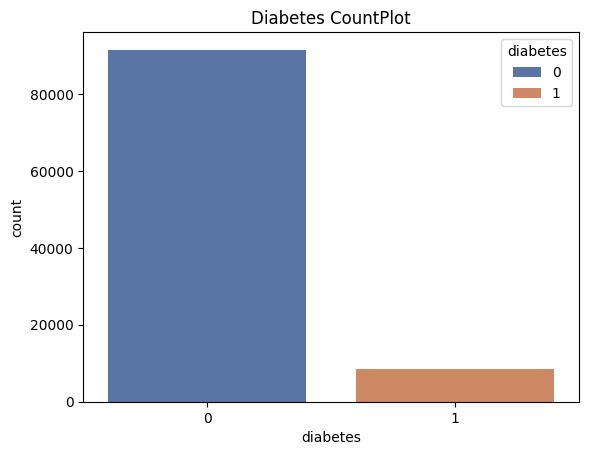

In [9]:
# Countplot of Gender 
sns.countplot(x='diabetes', data=df, hue='diabetes', palette='deep')
plt.title('Diabetes CountPlot')
plt.show()

In [4]:
# Label encoding gender
encoder=LabelEncoder()

df['gender']=encoder.fit_transform(df['gender'])
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (100000, 13)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


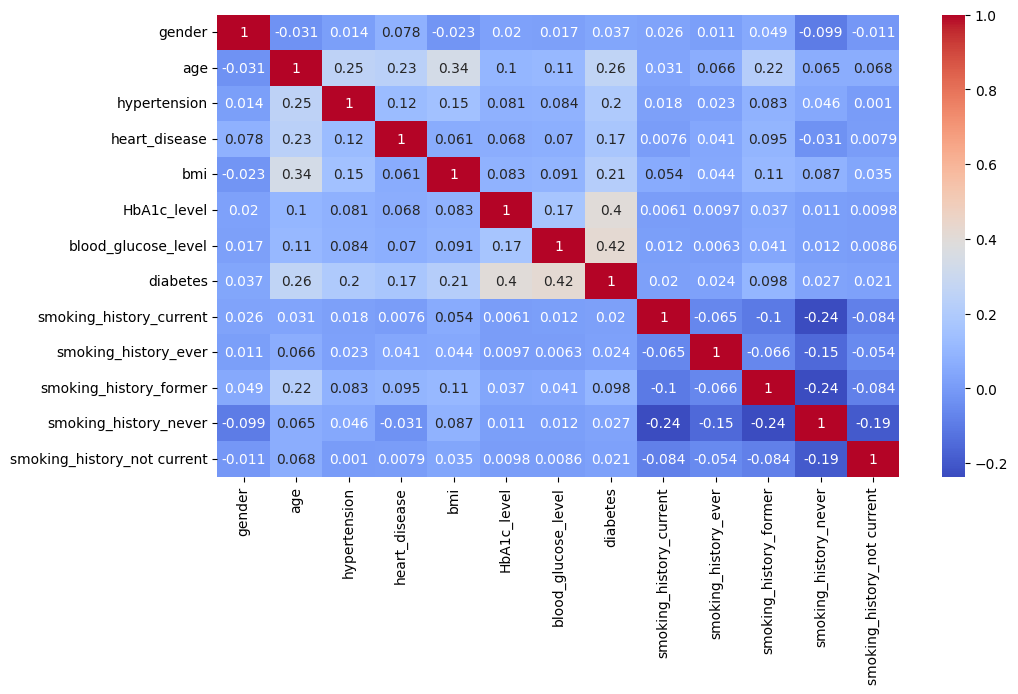

In [11]:
# Correlation Heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='blood_glucose_level', ylabel='bmi'>

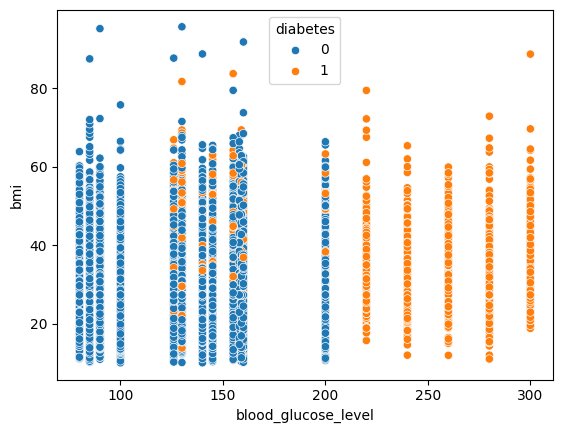

In [12]:
# scatter lot of blood glucose level against bmi
sns.scatterplot(data=df, x='blood_glucose_level', y='bmi', hue='diabetes')

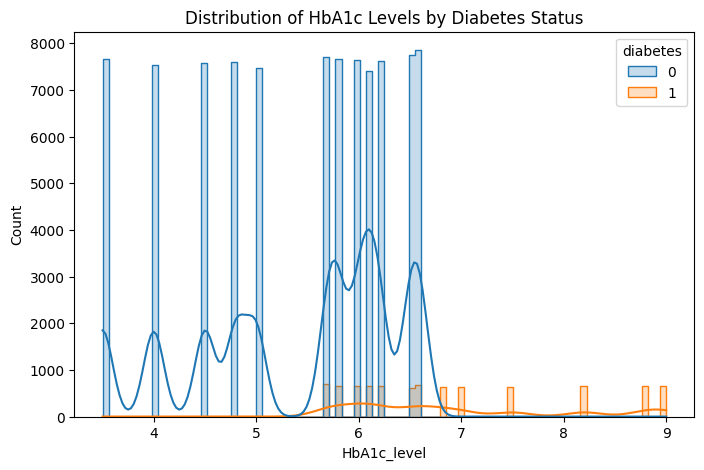

In [13]:
# Histogram lot of HbA1c_level against Count
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes', kde=True, element="step")
plt.title("Distribution of HbA1c Levels by Diabetes Status")
plt.show()

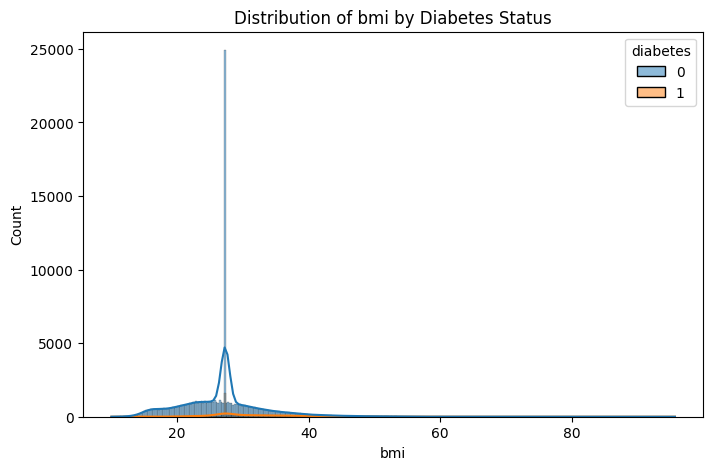

In [14]:
# Histogram lot of bmi against Count
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='bmi', hue='diabetes', kde=True)
plt.title("Distribution of bmi by Diabetes Status")
plt.show()

Data scaling and splitting

In [5]:
# Defining the features (X) and target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

scaler = StandardScaler()
# X = scaler.fit_transform(X)


X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [6]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Dataset Shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing Dataset Shape: X={X_test.shape}, y={y_test.shape}")


Training Dataset Shape: X=(80000, 12), y=(80000,)
Testing Dataset Shape: X=(20000, 12), y=(20000,)


### Model Training

In [7]:
# Instantiate RandomForest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
# Making predictions
y_pred = rf_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.96965


#### Training a Logistic Regression Model

In [19]:
# Initialize models
lr_model = LogisticRegression(random_state=42)

# Train and evaluate models
lr_model.fit(X_train, y_train)


# Predictions
y_pred_lr = lr_model.predict(X_test)


# Accuracy score
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.9605


#### Training a Decision Tree Model

In [20]:
# Initializing the model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy:  0.9508


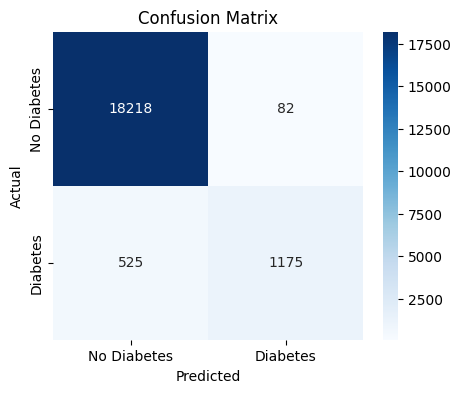

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



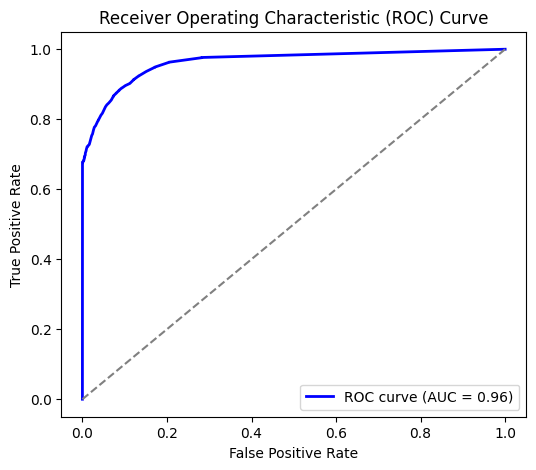

In [23]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


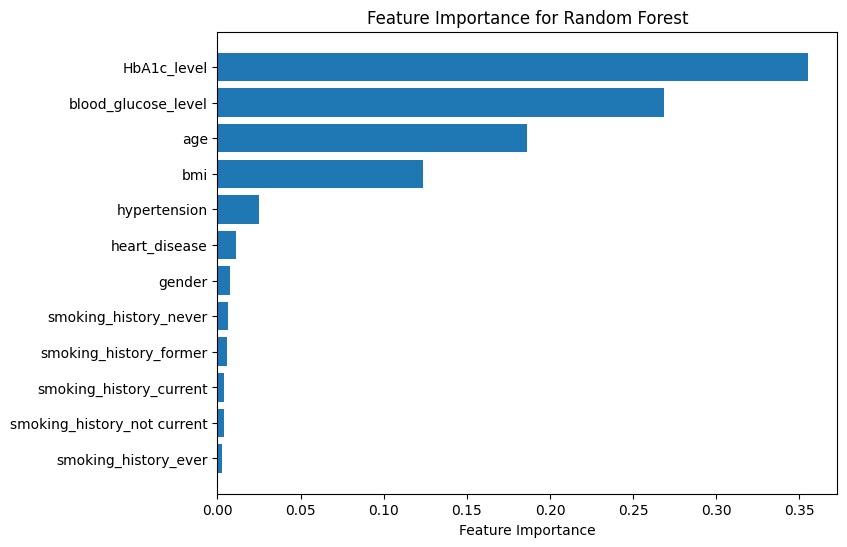

In [12]:
# Feature importance plot
feature_importance = rf_model.feature_importances_
features = X_test.columns
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

### Saving the model

In [13]:
# Saving the model
joblib.dump(rf_model, "../models/randomforest__model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(encoder, "../models/encoder.pkl")

['../models/encoder.pkl']

In [26]:
test_loc = '../data/test'
train_loc = '../data/train'

In [27]:
# Saving the training and test datasets as CSV files
pd.DataFrame(X_train).to_csv(os.path.join(train_loc, 'X_train.csv'), index=False)
pd.DataFrame(X_test).to_csv(os.path.join(test_loc, 'X_test.csv'), index=False)
pd.DataFrame(y_train).to_csv(os.path.join(train_loc, 'y_train.csv'), index=False)
pd.DataFrame(y_test).to_csv(os.path.join(test_loc, 'y_test.csv'), index=False)

In [28]:
# Loading the data
X_train = pd.read_csv(os.path.join(train_loc, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(train_loc, 'y_train.csv'))
X_test = pd.read_csv(os.path.join(test_loc, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(test_loc, 'y_test.csv'))

### Testing